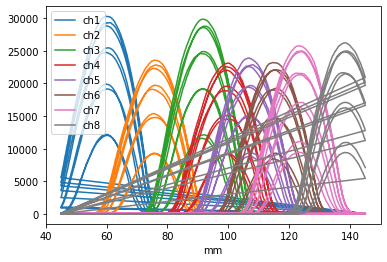

In [13]:
import pandas as pd
import numpy as np
import os
os.chdir("/home/ml/optiguardml/models")
dataset = pd.read_csv('DataRaw.csv')
dataset = dataset.loc[(dataset.mm >= 45) & (dataset.mm <= 145)]
dataset.reset_index(inplace=True, drop=True)
dataset = dataset.dropna()

dataset['offsetx_abs'] = dataset.offsetx.abs() 
dataset

plotcols = dataset.filter(like='ch').columns
dataset.plot(x='mm', y = plotcols)

In [14]:
ds = dataset
ds = ds[(ds.mm >45) & (ds.mm < 140)]

ds = ds.sort_values(['mm', 'offsetx_abs'])
ds

,mm,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,offsetx,offsetx_abs
4005,45.1,5815.0,31.0,16.0,38.0,13.0,21.0,45.0,23.0,0.0,0.0
3004,45.1,4550.0,22.0,17.0,37.0,13.0,21.0,45.0,23.0,-3.0,3.0
5006,45.1,5050.0,19.0,18.0,38.0,13.0,22.0,45.0,23.0,3.0,3.0
2003,45.1,2589.0,15.0,16.0,37.0,13.0,21.0,45.0,23.0,-6.0,6.0
6007,45.1,3808.0,26.0,16.0,37.0,13.0,21.0,45.0,24.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...
6955,139.9,50.0,25.0,19.0,38.0,13.0,23.0,133.0,21341.0,6.0,6.0
1950,139.9,51.0,27.0,18.0,37.0,13.0,21.0,57.0,16057.0,-9.0,9.0
7956,139.9,50.0,27.0,18.0,37.0,13.0,22.0,80.0,16897.0,9.0,9.0
949,139.9,50.0,22.0,19.0,37.0,13.0,21.0,48.0,9246.0,-12.0,12.0


In [15]:
# drop too low levels
#lowlevel = 1000
#for i in range(1,9):
#    ds.iloc[:,i] = [0 if j < lowlevel else j for j in ds.iloc[:,i]]
#ds

In [52]:
# create ratio columns
ds['ch3_div_ch5'] = ds.ch3 /ds.ch5
ds['ch4_div_ch6'] = ds.ch4 /ds.ch6
ds['ch5_div_ch7'] = ds.ch5 /ds.ch7
ds['ch3_div_ch4'] = ds.ch3 /ds.ch4
ds['ch5_div_ch4'] = ds.ch5 /ds.ch4
ds['ch6_div_ch5'] = ds.ch6 /ds.ch5
ds['ch7_div_ch6'] = ds.ch7 /ds.ch6

# create target column
ds['is_offset'] = np.where(ds.offsetx_abs > 0, 'NoOffset', 'Offset')
dcolumns = ds.filter(like='div').columns.to_list()
ds

,mm,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,offsetx,offsetx_abs,ch3_div_ch5,ch4_div_ch6,ch5_div_ch7,ch3_div_ch4,ch5_div_ch4,ch6_div_ch5,ch7_div_ch6,is_offset
4005,45.1,5815.0,31.0,16.0,38.0,13.0,21.0,45.0,23.0,0.0,0.0,1.230769,1.809524,0.288889,0.421053,0.342105,1.615385,2.142857,Offset
3004,45.1,4550.0,22.0,17.0,37.0,13.0,21.0,45.0,23.0,-3.0,3.0,1.307692,1.761905,0.288889,0.459459,0.351351,1.615385,2.142857,NoOffset
5006,45.1,5050.0,19.0,18.0,38.0,13.0,22.0,45.0,23.0,3.0,3.0,1.384615,1.727273,0.288889,0.473684,0.342105,1.692308,2.045455,NoOffset
2003,45.1,2589.0,15.0,16.0,37.0,13.0,21.0,45.0,23.0,-6.0,6.0,1.230769,1.761905,0.288889,0.432432,0.351351,1.615385,2.142857,NoOffset
6007,45.1,3808.0,26.0,16.0,37.0,13.0,21.0,45.0,24.0,6.0,6.0,1.230769,1.761905,0.288889,0.432432,0.351351,1.615385,2.142857,NoOffset
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6955,139.9,50.0,25.0,19.0,38.0,13.0,23.0,133.0,21341.0,6.0,6.0,1.461538,1.652174,0.097744,0.500000,0.342105,1.769231,5.782609,NoOffset
1950,139.9,51.0,27.0,18.0,37.0,13.0,21.0,57.0,16057.0,-9.0,9.0,1.384615,1.761905,0.228070,0.486486,0.351351,1.615385,2.714286,NoOffset
7956,139.9,50.0,27.0,18.0,37.0,13.0,22.0,80.0,16897.0,9.0,9.0,1.384615,1.681818,0.162500,0.486486,0.351351,1.692308,3.636364,NoOffset
949,139.9,50.0,22.0,19.0,37.0,13.0,21.0,48.0,9246.0,-12.0,12.0,1.461538,1.761905,0.270833,0.513514,0.351351,1.615385,2.285714,NoOffset


In [39]:
#for i in dcolumns:
#    ds.plot(x='offsetx_abs', y=i, kind='scatter')

In [40]:
# generate standardized
#origcols = []
#for i in range(1,9):
#    origcols.append(f'ch{i}')
#    #dataset[f'ch_norm_{i}'] = (dataset[f'ch{i}'] - dataset[f'ch{i}'].mean()) / dataset[f'ch{i}'].std()
#    dataset[f'ch_norm_{i}'] = dataset[f'ch{i}'] / dataset[f'ch{i}'].max()
#
#dataset.drop(origcols, axis=1, inplace=True)
#    
#print(dataset)


In [53]:
predcols = ds.filter(like='div').columns.to_list()
predcols.append('is_offset')
predcols

['ch3_div_ch5',
 'ch4_div_ch6',
 'ch5_div_ch7',
 'ch3_div_ch4',
 'ch5_div_ch4',
 'ch6_div_ch5',
 'ch7_div_ch6',
 'is_offset']

In [54]:
dataset = ds.filter(predcols)
dataset

,ch3_div_ch5,ch4_div_ch6,ch5_div_ch7,ch3_div_ch4,ch5_div_ch4,ch6_div_ch5,ch7_div_ch6,is_offset
4005,1.230769,1.809524,0.288889,0.421053,0.342105,1.615385,2.142857,Offset
3004,1.307692,1.761905,0.288889,0.459459,0.351351,1.615385,2.142857,NoOffset
5006,1.384615,1.727273,0.288889,0.473684,0.342105,1.692308,2.045455,NoOffset
2003,1.230769,1.761905,0.288889,0.432432,0.351351,1.615385,2.142857,NoOffset
6007,1.230769,1.761905,0.288889,0.432432,0.351351,1.615385,2.142857,NoOffset
...,...,...,...,...,...,...,...,...
6955,1.461538,1.652174,0.097744,0.500000,0.342105,1.769231,5.782609,NoOffset
1950,1.384615,1.761905,0.228070,0.486486,0.351351,1.615385,2.714286,NoOffset
7956,1.384615,1.681818,0.162500,0.486486,0.351351,1.692308,3.636364,NoOffset
949,1.461538,1.761905,0.270833,0.513514,0.351351,1.615385,2.285714,NoOffset


In [55]:
from pycaret.classification import *

In [44]:
#? setup

In [58]:
cl = setup(data = dataset, 
                   transformation=False, 
                   target = 'is_offset', 
                   pca = False,
                   polynomial_features=False,
                   polynomial_degree=3,
                   remove_outliers=False,
                   outliers_threshold=0.05,
                   trigonometry_features=False,
                   session_id=123, 
                   feature_selection=False,
                   feature_interaction=False,
                   feature_ratio=False,
                   ignore_features=None
                  )

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,"NoOffset: 0, Offset: 1"
3,Original Data,"(8541, 8)"
4,Missing Values,False
5,Numeric Features,7
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [96]:
#exp_reg101

In [59]:
compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.904500,0.885800,0.239300,0.721000,0.354200,0.316800
1,Light Gradient Boosting Machine,0.900000,0.885000,0.275400,0.619700,0.377300,0.331900
2,Extra Trees Classifier,0.899300,0.853200,0.338700,0.585100,0.426700,0.376000
3,Random Forest Classifier,0.895100,0.824800,0.253000,0.561200,0.346800,0.299000
4,Gradient Boosting Classifier,0.891400,0.816500,0.028500,0.675000,0.054000,0.047300
5,Extreme Gradient Boosting,0.891400,0.819900,0.022500,0.600000,0.043200,0.038800
6,Logistic Regression,0.888900,0.502700,0.000000,0.000000,0.000000,0.000000
7,Ridge Classifier,0.888900,0.000000,0.000000,0.000000,0.000000,0.000000
8,Ada Boost Classifier,0.888900,0.718200,0.012000,0.350000,0.022900,0.017900
9,Linear Discriminant Analysis,0.888900,0.503100,0.000000,0.000000,0.000000,0.000000


In [98]:
#create_model.__doc__
#help(tune_model)
# et=tune_model('et', n_iter=100)
et=create_model('et')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.6069,11.6430,3.4122,0.2093,0.6929,0.4185
1,3.0758,15.1943,3.8980,0.1334,0.7932,0.4598
2,3.1349,15.5141,3.9388,0.0576,0.8428,0.4159
3,2.9956,14.4126,3.7964,0.0413,0.7604,0.4677
4,2.9472,14.9615,3.8680,0.1152,0.8155,0.4397
5,2.7351,12.9579,3.5997,0.1537,0.7755,0.4024
6,2.8218,13.3205,3.6497,0.1754,0.7609,0.4312
7,2.8067,12.9531,3.5990,0.1453,0.7445,0.4618
8,2.7793,12.4738,3.5318,0.1648,0.7054,0.4236
9,2.6216,11.8672,3.4449,0.2133,0.6992,0.4119


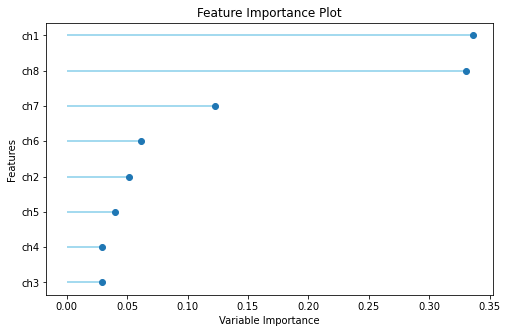

In [344]:
plot_model(et, 'feature')

In [345]:
#interpret_model(et)

In [346]:
#interpret_model(et, plot = 'correlation')

In [347]:
#interpret_model(et, plot = 'reason', observation = 10)

In [348]:
#pred=predict_model(et, data=data_unseen)
#pred

In [349]:
#? predict_model

In [350]:
#save_model(et, 'savedmodelet')
#et_saved = load_model('savedmodelet')

In [351]:
#save_experiment('experiment')

In [352]:
#experiment_loaded = load_experiment('experiment')

In [ ]:
import pandas as pd
import time
import os
os.chdir("/home/ml/optiguardml/models")
dataset = pd.read_csv('DataRaw.csv')
dataset = dataset.loc[(dataset.mm >= 45) & (dataset.mm <= 145)]
dataset.reset_index(inplace=True, drop=True)
dataset = dataset.dropna()

dataset['offsetx_abs'] = dataset.offsetx.abs()

# drop too low levels

from pycaret.regression import *

for lowlevel in range(0, 10000, 100):
    data = dataset.sample(frac=0.5, random_state=786)
    data_unseen = dataset.drop(data.index).reset_index(drop=True)
    data.reset_index(drop=True, inplace=True)

    for i in range(1,9):
            data.iloc[:,i] = [0 if j < lowlevel else j for j in data.iloc[:,i]]

    es = setup(data = data, target = 'mm', ignore_features=['offsetx', 'offsetx_abs'], silent=True)
    print(f'lowlevel: {lowlevel}')
    et = create_model('et')
    time.sleep(10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.8105,62.5965,7.9118,0.9244,0.0988,0.0384
1,2.2517,43.5682,6.6006,0.9459,0.0863,0.0316
2,2.5475,42.1084,6.4891,0.9537,0.0954,0.0401
3,2.7292,68.1901,8.2577,0.9151,0.1013,0.0357
4,3.1126,68.1046,8.2525,0.9257,0.1088,0.0438
5,2.3710,45.3006,6.7306,0.9437,0.0875,0.0320
6,2.7853,61.9058,7.8680,0.9221,0.1010,0.0386
7,2.7197,50.1772,7.0836,0.9425,0.0981,0.0416
8,3.2691,79.2181,8.9005,0.9071,0.1155,0.0463
9,2.7355,72.2182,8.4981,0.9115,0.1064,0.0373
